In [3]:
import pulp

# Resourcing Problem
We’re consulting for a boutique car manufacturer, producing luxury cars.

They run on one month (30 days) cycles, we have one cycle to show we can provide value.

There is one robot, 2 engineers and one detailer in the factory. The detailer has some holiday off, so only has 21 days available.

The 2 cars need different time with each resource:

Robot time: Car A – 3 days; Car B – 4 days.

Engineer time: Car A – 5 days; Car B – 6 days.

Detailer time: Car A – 1.5 days; Car B – 3 days.

Car A provides €30,000 profit, whilst Car B offers €45,000 profit.

At the moment, they produce 4 of each cars per month, for €300,000 profit. Not bad at all, but we think we can do better for them.

This can be modelled as follows:

\begin{equation}
\begin{aligned}
\label{eq::Pro1}
\max & P =30000 \cdot A+45000 \cdot B\\
s.t. & \\
& 3A +4B \leq 30 \\
& 5A +6B \leq 60 \\
& 1.5A +3B \leq 21 \\
& A \geq 0\\
& B \geq 0\\
\end{aligned}
\end{equation}

In [4]:
'''Define the problems'''
model = pulp.LpProblem("Profit maximising problem", pulp.LpMaximize)

'''Define the variables'''

A = pulp.LpVariable('A', lowBound=0, cat='Integer')
B = pulp.LpVariable('B', lowBound=0, cat='Integer')

'''Define the objectives'''
model += 30000 * A + 45000 * B, "Profit"

'''Constraints'''
model += 3 * A + 4 * B <= 30
model += 5 * A + 6 * B <= 60
model += 1.5 * A + 3 * B <= 21

model.solve()

print(pulp.LpStatus[model.status])

print("Production of Car A = {}".format(A.varValue))
print("Production of Car B = {}".format(B.varValue))

print(pulp.value(model.objective))



Optimal
Production of Car A = 2.0
Production of Car B = 6.0
330000.0


In [10]:
dir(model)

type(model.variables):


SyntaxError: invalid syntax (<ipython-input-10-bfbed333766e>, line 3)

# Blending Problem

We’ll make 2 types of sausage:

Economy (>40% Pork)

Premium (>60% Pork)

One sausage is 50 grams (0.05 kg)

According to government regulations, the most starch we can use in our sausages is 25%

We have a contract with a butcher, and have already purchased 23 kg pork, that must go in our sausages.

We have a demand for 350 economy sausages and 500 premium sausages.

We need to figure out how to most cost effectively blend our sausages.

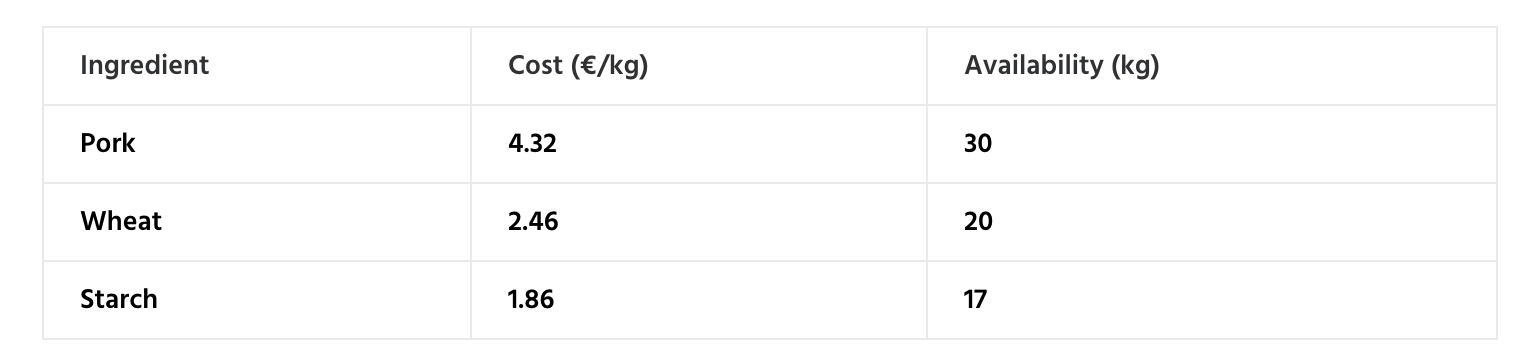

This can be modelled as follows:

\begin{equation}
\begin{aligned}
\label{eq::Pro3}
\min & Cost = 4.32(p_{e}+p_{p})+2.46(w_{e}+w_{p})+1.86(s_{e}+s_{p})\\
s.t. & \\
& p_{e}+w_{e}+s_{e} = 350 \times 0.05 \\
& p_{p}+w_{p}+s_{p} = 500 \times 0.05 \\
& p_{e} \geq 0.4 \cdot (p_{e}+w_{e}+s_{e}) \\
& p_{p} \geq 0.4 \cdot (p_{p}+w_{p}+s_{p}) \\
& s_{e} \leq 0.25 \cdot (p_{e}+w_{e}+s_{e}) \\
& s_{p} \leq 0.25 \cdot (p_{p}+w_{p}+s_{p}) \\
& p_{e} + p_{p} \leq 30 \\
& w_{e} + w_{p} \leq 20 \\
& s_{e}+s_{p} \leq 17\\
& p_{e}+p_{p} \geq 23\\
\end{aligned}
\end{equation}








In [9]:
'''Define the problem'''
model = pulp.LpProblem("Cost minimising blending problem", pulp.LpMinimize)

'''Construct our decision variable lists'''
sausage_types = ['economy', 'premium']
ingredients = ['pork', 'wheat', 'starch']

ing_weight = pulp.LpVariable.dicts("weight kg",((i, j) for i in sausage_types for j in ingredients),lowBound=0, cat='Continuous')

'''Objective Function'''
model += (pulp.lpSum([4.32 * ing_weight[(i, 'pork')] +\
                      2.46 * ing_weight[(i, 'wheat')]+ \
                      1.86 * ing_weight[(i, 'starch')]\
                    for i in sausage_types]))

'''Constraints'''

'''350 economy and 500 premium sausages at 0.05 kg'''

model += pulp.lpSum([ing_weight['economy', j] for j in ingredients]) == 350 * 0.05
model += pulp.lpSum([ing_weight['premium', j] for j in ingredients]) == 500 * 0.05

'''Economy has >= 40% pork, premium >= 60% pork'''

model += ing_weight['economy', 'pork'] >= (0.4 * pulp.lpSum([ing_weight['economy', j] for j in ingredients]))

model += ing_weight['premium', 'pork'] >= ( 0.6 * pulp.lpSum([ing_weight['premium', j] for j in ingredients]))

'''Sausages must be <= 25% starch'''
model += ing_weight['economy', 'starch'] <= (0.25 * pulp.lpSum([ing_weight['economy', j] for j in ingredients]))

model += ing_weight['premium', 'starch'] <= (0.25 * pulp.lpSum([ing_weight['premium', j] for j in ingredients]))

'''We have at most 30 kg of pork, 20 kg of wheat and 17 kg of starch available'''
model += pulp.lpSum([ing_weight[i, 'pork'] for i in sausage_types]) <= 30
model += pulp.lpSum([ing_weight[i, 'wheat'] for i in sausage_types]) <= 20
model += pulp.lpSum([ing_weight[i, 'starch'] for i in sausage_types]) <= 17

'''We have at least 23 kg of pork to use up'''
model += pulp.lpSum([ing_weight[i, 'pork'] for i in sausage_types]) >= 23



model.solve()

print(pulp.LpStatus[model.status])

for var in ing_weight:
    var_value = ing_weight[var].varValue
    print("The weight of {0} in {1} sausages is {2} kg".format(var[1], var[0], var_value))
    
total_cost = pulp.value(model.objective)

print("The total cost is €{} for 350 economy sausages and 500 premium sausages".format(round(total_cost, 2)))


Optimal
The weight of pork in economy sausages is 7.0 kg
The weight of wheat in economy sausages is 6.125 kg
The weight of starch in economy sausages is 4.375 kg
The weight of pork in premium sausages is 16.0 kg
The weight of wheat in premium sausages is 2.75 kg
The weight of starch in premium sausages is 6.25 kg
The total cost is €140.96 for 350 economy sausages and 500 premium sausages
